In [3]:
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv('train_features.csv')
label = pd.read_csv('train_labels.csv')
test = pd.read_csv('test_features.csv')

In [8]:
train

3.750e-01  2.726e-02  6.520e-01  1.000e+00  7.770e-01  4.278e-02  \
0         0.5625    0.02289     0.6114        1.0     0.7414    0.03209   
1         0.7500    0.00000     0.0000        0.0     0.0000    0.00000   
2         0.0625    0.04107     0.6023        1.0     0.7203    0.10700   
3         0.4375    0.04673     0.6184        1.0     0.7541    0.10700   
4         0.6250    0.06408     0.5131        1.0     0.6825    0.02139   
...          ...        ...        ...        ...        ...        ...   
14994     0.3125    0.02490     0.6313        1.0     0.6596    0.07487   
14995     0.5625    0.01605     0.7239        1.0     0.8649    0.02674   
14996     0.5000    0.05818     0.5528        1.0     0.7306    0.02674   
14997     0.6875    0.11020     0.4312        1.0     0.6322    0.08021   
14998     0.3125    0.03906     0.5333        1.0     0.6738    0.03209   

       5.405e-02  9.009e-03  0.000e+00  6.627e-01  ...  3.805e-01  5.769e-01  \
0        0.05405   0.000000    0.00000     0.6122  ...     0.3542     0.4804   
1        0.00000   0.180200    0.00000     0.0000  ...     0.0000     0.3511   
2        0.02703   0.099100    0.00000     0.5900  ...     0.6722     0.2700   
3        0.01351   0.099100    0.05333     0.6076  ...     0.4661     0.5061   
4        0.04054   0.018020    0.00000     0.5629  ...     0.4806     0.4916   
...          ...        ...        ...        ...  ...        ...        ...   
14994    0.04054   0.009009    0.00000     0.6088  ...     0.6267     0.6910   
14995    0.04054   0.000000    0.00000     0.5376  ...     0.3952     0.5266   
14996    0.06757   0.009009    0.00000     0.5960  ...     0.5154     0.4496   
14997    0.08108   0.036040    0.00000     0.5657  ...     0.3387     0.4416   
14998    0.02703   0.018020    0.00000     0.5609  ...     0.5191     0.4855   

       2.227e-01  0.000e+00.13  1.000e+00.3  0.000e+00.14  4.750e-01  \
0         0.2321       0.09170       0.7778       0.22220     0.3695   
1         0.0000       0.00000       0.0000       0.00000     0.0000   
2         0.1663       0.30670       0.4286       0.57140     0.4056   
3         0.2111       0.06738       0.8125       0.18750     0.3618   
4         0.4856       0.21290       0.7593       0.24070     0.3583   
...          ...           ...          ...           ...        ...   
14994     0.3048       0.04216       0.9091       0.09091     0.4100   
14995     0.3783       0.13080       0.8000       0.20000     0.3269   
14996     0.1957       0.09021       0.7500       0.25000     0.3035   
14997     0.2066       0.10480       0.7317       0.26830     0.3400   
14998     0.2332       0.16120       0.6667       0.33330     0.3448   

       1.000e+00.4  9.500e-01  8.750e-01  
0           0.6500     0.0000     0.5000  
1           1.0000     0.0000     0.5000  
2           0.5813     0.8333     0.2917  
3           0.8250     0.0000     0.5000  
4           0.7176     0.3333     0.5917  
...            ...        ...        ...  
14994       0.8125     1.0000     0.1000  
14995       0.8597     0.3750     0.4375  
14996       0.7825     0.0000     0.5000  
14997       0.8367     0.5000     0.7500  
14998       0.8120     0.3750     0.4375  

[14999 rows x 36 columns]

# Data splitting

In [9]:
train.head()

3.750e-01  2.726e-02  6.520e-01  1.000e+00  7.770e-01  4.278e-02  \
0     0.5625    0.02289     0.6114        1.0     0.7414    0.03209   
1     0.7500    0.00000     0.0000        0.0     0.0000    0.00000   
2     0.0625    0.04107     0.6023        1.0     0.7203    0.10700   
3     0.4375    0.04673     0.6184        1.0     0.7541    0.10700   
4     0.6250    0.06408     0.5131        1.0     0.6825    0.02139   

   5.405e-02  9.009e-03  0.000e+00  6.627e-01  ...  3.805e-01  5.769e-01  \
0    0.05405    0.00000    0.00000     0.6122  ...     0.3542     0.4804   
1    0.00000    0.18020    0.00000     0.0000  ...     0.0000     0.3511   
2    0.02703    0.09910    0.00000     0.5900  ...     0.6722     0.2700   
3    0.01351    0.09910    0.05333     0.6076  ...     0.4661     0.5061   
4    0.04054    0.01802    0.00000     0.5629  ...     0.4806     0.4916   

   2.227e-01  0.000e+00.13  1.000e+00.3  0.000e+00.14  4.750e-01  1.000e+00.4  \
0     0.2321       0.09170       0.7778        0.2222     0.3695       0.6500   
1     0.0000       0.00000       0.0000        0.0000     0.0000       1.0000   
2     0.1663       0.30670       0.4286        0.5714     0.4056       0.5813   
3     0.2111       0.06738       0.8125        0.1875     0.3618       0.8250   
4     0.4856       0.21290       0.7593        0.2407     0.3583       0.7176   

   9.500e-01  8.750e-01  
0     0.0000     0.5000  
1     0.0000     0.5000  
2     0.8333     0.2917  
3     0.0000     0.5000  
4     0.3333     0.5917  

[5 rows x 36 columns]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val, y_train, y_val = train_test_split(train, label, test_size=0.1, random_state=1) 

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [18]:
y_pred = clf.predict(X_val)

In [19]:
from sklearn import metrics

In [20]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.446


In [22]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# directly fit

In [25]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.keys(),class_names=['0','1','2'])

In [26]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.172312 to fit



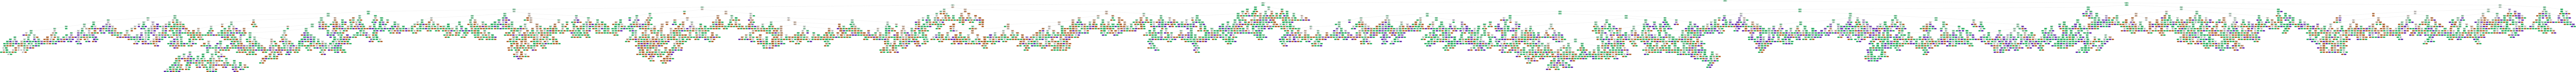

In [31]:
# graph.write_png('diabetes.png')
Image(graph.create_png())

In [45]:
# try different hyperparameters
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=5)
clf2 = clf2.fit(X_train,y_train)
y_pred = clf2.predict(X_val)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.572


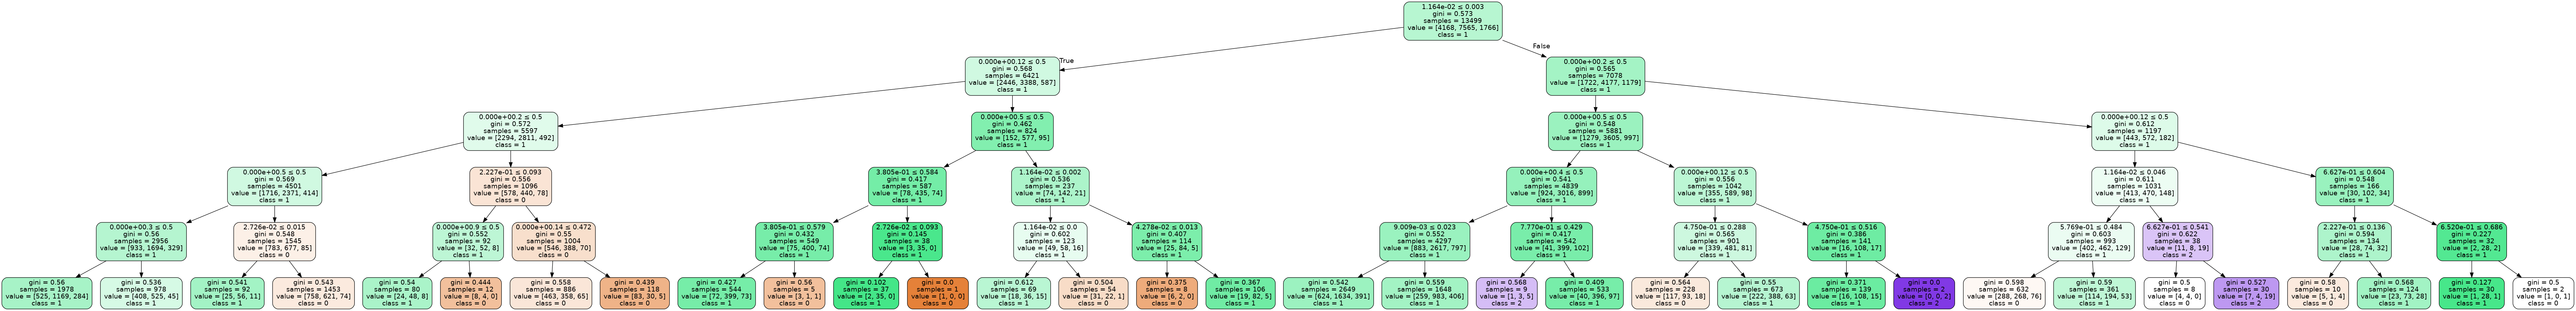

In [46]:
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.keys(),class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [53]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns

In [63]:
data =pd.concat([X_train, y_train], axis = 1)

In [64]:
data

3.750e-01  2.726e-02  6.520e-01  1.000e+00  7.770e-01  4.278e-02  \
11224     0.5000    0.04248     0.4913        1.0     0.5869    0.05348   
8931      0.2500    0.03045     0.5725        1.0     0.7044    0.02674   
13289     0.4375    0.01794     0.7285        1.0     0.8137    0.02674   
7160      0.3750    0.11720     0.3761        1.0     0.6000    0.01070   
4904      0.6875    0.14830     0.4420        1.0     0.6988    0.01604   
...          ...        ...        ...        ...        ...        ...   
905       0.3125    0.03623     0.5705        1.0     0.7219    0.04278   
5192      0.1875    0.02325     0.6907        1.0     0.8417    0.03209   
12172     0.5625    0.05912     0.5840        1.0     0.7450    0.08021   
235       0.3750    0.01711     0.6503        1.0     0.7765    0.01604   
13349     0.3125    0.17160     0.3005        1.0     0.4232    0.03209   

       5.405e-02  9.009e-03  0.000e+00  6.627e-01  ...  5.769e-01  2.227e-01  \
11224    0.09459   0.018020    0.00000     0.5710  ...     0.4243    0.16080   
8931     0.02703   0.018020    0.01333     0.5967  ...     0.5491    0.22440   
13289    0.06757   0.000000    0.01333     0.6152  ...     0.4954    0.08462   
7160     0.02703   0.009009    0.00000     0.4789  ...     0.3951    0.30440   
4904     0.02703   0.009009    0.02667     0.5509  ...     0.4430    0.23540   
...          ...        ...        ...        ...  ...        ...        ...   
905      0.05405   0.009009    0.00000     0.6121  ...     0.4907    0.23040   
5192     0.04054   0.009009    0.00000     0.6035  ...     0.4068    0.09794   
12172    0.02703   0.081080    0.00000     0.5334  ...     0.4266    0.41080   
235      0.02703   0.000000    0.00000     0.5566  ...     0.5921    0.31050   
13349    0.08108   0.090090    0.01333     0.5449  ...     0.5244    0.23890   

       0.000e+00.13  1.000e+00.3  0.000e+00.14  4.750e-01  1.000e+00.4  \
11224       0.19770       0.5294        0.4706     0.4111       0.7840   
8931        0.06895       0.8182        0.1818     0.4855       0.7917   
13289       0.17560       0.4000        0.6000     0.9000       0.7611   
7160        0.23290       0.6438        0.3562     0.2920       0.6937   
4904        0.16980       0.6571        0.3429     0.3793       0.7235   
...             ...          ...           ...        ...          ...   
905         0.05795       0.8462        0.1538     0.3129       0.8444   
5192        0.09030       0.6000        0.4000     0.3167       0.8375   
12172       0.23080       0.7111        0.2889     0.3547       0.6484   
235         0.06134       0.8750        0.1250     0.4814       0.8750   
13349       0.09788       0.7714        0.2286     0.4442       0.6515   

       9.500e-01  8.750e-01  1  
11224     0.2889     0.4222  1  
8931      0.0000     0.5000  0  
13289     0.0000     0.5000  1  
7160      0.1333     0.5583  1  
4904      0.0000     0.5000  1  
...          ...        ... ..  
905       0.0000     0.5000  1  
5192      0.0000     0.5000  1  
12172     0.6569     0.5934  2  
235       0.3000     1.0000  1  
13349     0.0000     0.5000  2  

[13499 rows x 37 columns]

In [65]:
corrmat = data.corr()

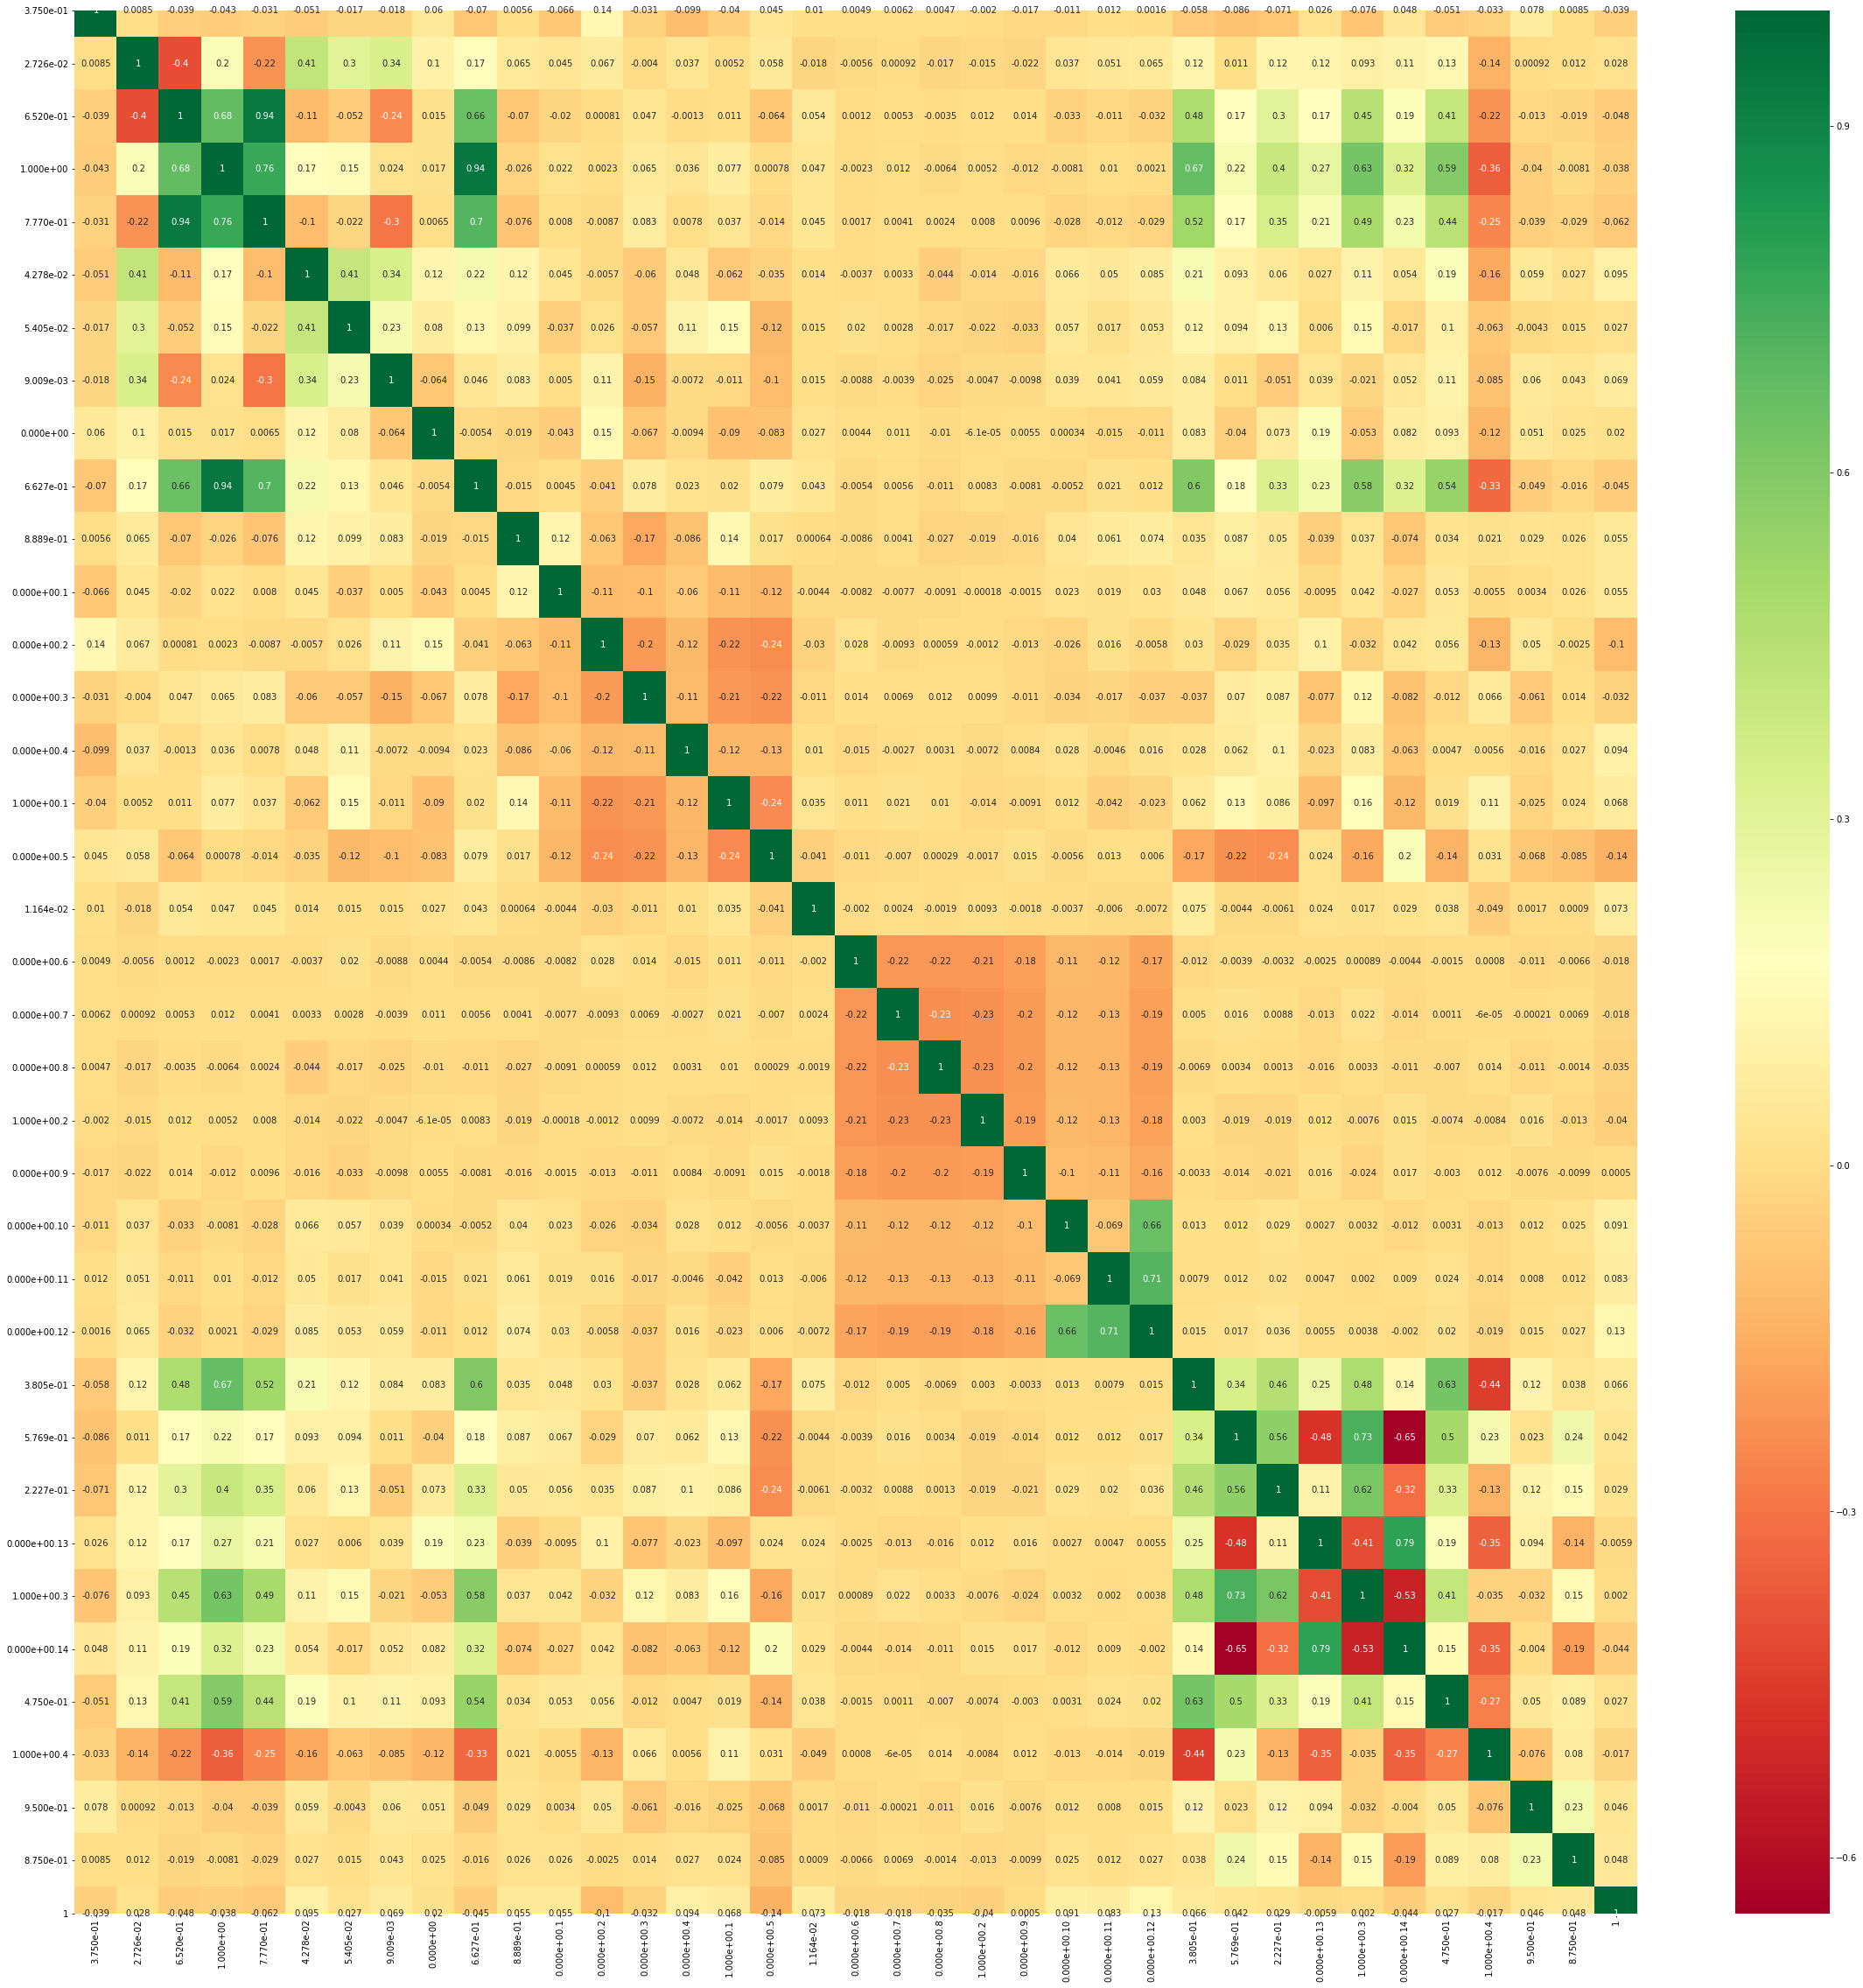

In [67]:
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [68]:
top_corr_features

Index(['3.750e-01', '2.726e-02', '6.520e-01', '1.000e+00', '7.770e-01',
       '4.278e-02', '5.405e-02', '9.009e-03', '0.000e+00', '6.627e-01',
       '8.889e-01', '0.000e+00.1', '0.000e+00.2', '0.000e+00.3', '0.000e+00.4',
       '1.000e+00.1', '0.000e+00.5', '1.164e-02', '0.000e+00.6', '0.000e+00.7',
       '0.000e+00.8', '1.000e+00.2', '0.000e+00.9', '0.000e+00.10',
       '0.000e+00.11', '0.000e+00.12', '3.805e-01', '5.769e-01', '2.227e-01',
       '0.000e+00.13', '1.000e+00.3', '0.000e+00.14', '4.750e-01',
       '1.000e+00.4', '9.500e-01', '8.750e-01', '1'],
      dtype='object')

In [74]:
corr_with_label = data[top_corr_features].corr()['1']

In [75]:
corr_with_label = abs(corr_with_label)

In [76]:
corr_with_label

3.750e-01       0.038669
2.726e-02       0.027514
6.520e-01       0.048008
1.000e+00       0.038119
7.770e-01       0.061812
4.278e-02       0.094745
5.405e-02       0.026559
9.009e-03       0.069006
0.000e+00       0.019972
6.627e-01       0.045199
8.889e-01       0.055390
0.000e+00.1     0.055068
0.000e+00.2     0.101711
0.000e+00.3     0.031563
0.000e+00.4     0.093640
1.000e+00.1     0.068332
0.000e+00.5     0.144150
1.164e-02       0.073274
0.000e+00.6     0.018438
0.000e+00.7     0.017536
0.000e+00.8     0.035028
1.000e+00.2     0.040040
0.000e+00.9     0.000500
0.000e+00.10    0.090725
0.000e+00.11    0.082854
0.000e+00.12    0.126981
3.805e-01       0.065682
5.769e-01       0.042224
2.227e-01       0.029390
0.000e+00.13    0.005905
1.000e+00.3     0.002046
0.000e+00.14    0.044289
4.750e-01       0.026521
1.000e+00.4     0.017103
9.500e-01       0.046109
8.750e-01       0.047690
1               1.000000
Name: 1, dtype: float64

In [82]:
features = corr_with_label.argsort()[-16:-1][::-1] # array([4, 3, 1])

In [93]:
features

8.750e-01       16
9.500e-01       25
1.000e+00.4     12
4.750e-01        5
0.000e+00.14    14
1.000e+00.3     23
0.000e+00.13    24
2.227e-01       17
5.769e-01        7
3.805e-01       15
0.000e+00.12    26
0.000e+00.11     4
0.000e+00.10    10
0.000e+00.9     11
1.000e+00.2      2
Name: 1, dtype: int64

In [89]:
X_train_f = X_train[features.keys()]

In [90]:
X_train_f

8.750e-01  9.500e-01  1.000e+00.4  4.750e-01  0.000e+00.14  \
11224     0.4222     0.2889       0.7840     0.4111        0.4706   
8931      0.5000     0.0000       0.7917     0.4855        0.1818   
13289     0.5000     0.0000       0.7611     0.9000        0.6000   
7160      0.5583     0.1333       0.6937     0.2920        0.3562   
4904      0.5000     0.0000       0.7235     0.3793        0.3429   
...          ...        ...          ...        ...           ...   
905       0.5000     0.0000       0.8444     0.3129        0.1538   
5192      0.5000     0.0000       0.8375     0.3167        0.4000   
12172     0.5934     0.6569       0.6484     0.3547        0.2889   
235       1.0000     0.3000       0.8750     0.4814        0.1250   
13349     0.5000     0.0000       0.6515     0.4442        0.2286   

       1.000e+00.3  0.000e+00.13  2.227e-01  5.769e-01  3.805e-01  \
11224       0.5294       0.19770    0.16080     0.4243     0.4376   
8931        0.8182       0.06895    0.22440     0.5491     0.5445   
13289       0.4000       0.17560    0.08462     0.4954     0.3653   
7160        0.6438       0.23290    0.30440     0.3951     0.4685   
4904        0.6571       0.16980    0.23540     0.4430     0.4714   
...            ...           ...        ...        ...        ...   
905         0.8462       0.05795    0.23040     0.4907     0.4089   
5192        0.6000       0.09030    0.09794     0.4068     0.3350   
12172       0.7111       0.23080    0.41080     0.4266     0.5467   
235         0.8750       0.06134    0.31050     0.5921     0.3914   
13349       0.7714       0.09788    0.23890     0.5244     0.4801   

       0.000e+00.12  0.000e+00.11  0.000e+00.10  0.000e+00.9  1.000e+00.2  
11224           0.0           0.0           0.0          0.0          0.0  
8931            0.0           0.0           0.0          0.0          0.0  
13289           0.0           0.0           0.0          0.0          0.0  
7160            0.0           0.0           0.0          0.0          0.0  
4904            0.0           0.0           0.0          0.0          0.0  
...             ...           ...           ...          ...          ...  
905             0.0           0.0           0.0          0.0          0.0  
5192            0.0           0.0           0.0          1.0          0.0  
12172           0.0           0.0           0.0          0.0          1.0  
235             0.0           0.0           0.0          0.0          0.0  
13349           1.0           1.0           0.0          0.0          0.0  

[13499 rows x 15 columns]

In [91]:
X_val_f = X_val[features.keys()]

In [92]:
X_val_f

8.750e-01  9.500e-01  1.000e+00.4  4.750e-01  0.000e+00.14  \
11908     0.5000     0.0000       0.8017     0.4012        0.1282   
10508     0.5000     0.0000       0.7275     0.3871        0.2857   
9193      0.5000     0.0000       0.7632     0.3536        0.2714   
13087     0.5000     0.0000       0.7812     0.4481        0.2222   
506       0.7500     0.5000       0.7792     0.3854        0.1463   
...          ...        ...          ...        ...           ...   
618       0.5500     0.4000       0.6832     0.3303        0.2990   
13601     0.3821     0.3071       0.5750     0.5000        0.8889   
10235     0.5000     0.0000       0.6631     0.3582        0.2828   
14537     0.7061     0.5848       0.5000     0.4920        0.1111   
5176      0.6591     0.7273       0.7167     0.4186        0.1667   

       1.000e+00.3  0.000e+00.13  2.227e-01  5.769e-01  3.805e-01  \
11908       0.8718       0.07589     0.3732     0.5347     0.4195   
10508       0.7143       0.08287     0.1498     0.4418     0.3907   
9193        0.7286       0.17710     0.3438     0.4789     0.4950   
13087       0.7778       0.10590     0.2680     0.5115     0.3253   
506         0.8537       0.08821     0.3721     0.5453     0.5645   
...            ...           ...        ...        ...        ...   
618         0.7010       0.12140     0.2059     0.4375     0.4505   
13601       0.1111       0.60300     0.0545     0.0925     0.5550   
10235       0.7172       0.13960     0.2560     0.4776     0.5481   
14537       0.8889       0.04256     0.2462     0.5553     0.5209   
5176        0.8333       0.05232     0.1892     0.5784     0.5122   

       0.000e+00.12  0.000e+00.11  0.000e+00.10  0.000e+00.9  1.000e+00.2  
11908           0.0           0.0           0.0          0.0          0.0  
10508           0.0           0.0           0.0          0.0          0.0  
9193            0.0           0.0           0.0          0.0          0.0  
13087           0.0           0.0           0.0          0.0          1.0  
506             1.0           1.0           0.0          0.0          0.0  
...             ...           ...           ...          ...          ...  
618             1.0           0.0           1.0          0.0          0.0  
13601           0.0           0.0           0.0          1.0          0.0  
10235           0.0           0.0           0.0          0.0          0.0  
14537           1.0           0.0           1.0          0.0          0.0  
5176            1.0           0.0           1.0          0.0          0.0  

[1500 rows x 15 columns]

In [95]:
clf3 = DecisionTreeClassifier(criterion="gini", max_depth=5)
clf3 = clf3.fit(X_train_f,y_train)
y_pred = clf3.predict(X_val_f)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.5466666666666666


In [144]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(max_depth=5, random_state=0)
clf4 = clf4.fit(X_train,y_train)
y_pred = clf4.predict(X_val)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

/home/jingxianhuang96/anaconda3/envs/kag/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 0.57


In [125]:
from sklearn.ensemble import RandomForestClassifier
clf5 = RandomForestClassifier(max_depth=5, random_state=20)
clf5 = clf5.fit(X_train_f,y_train)
y_pred = clf5.predict(X_val_f)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

/home/jingxianhuang96/anaconda3/envs/kag/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 0.556


In [138]:
# Linear regression - poorly
from sklearn.linear_model import LinearRegression
clf6 = LinearRegression()
clf6 = clf6.fit(X_train,y_train)
y_pred = clf6.predict(X_val)
y_pred[y_pred<1] = 0
y_pred[(y_pred>=1) & (y_pred<2)] = 1
y_pred[y_pred>=2] = 2
print("Accuracy:",metrics.accuracy_score(np.array(y_val), y_pred))

Accuracy: 0.394
